In [1]:
import tensorflow as tf

In [3]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# train/test/val image directories
train_dir = 'data/train'
test_dir = 'data/test'
val_dir = 'data/val'

train_datagen = ImageDataGenerator()
test_datagen = ImageDataGenerator()

img_shape = (256, 256, 3)

train_generator = train_datagen.flow_from_directory(
        train_dir,
        target_size=img_shape[:2],
        class_mode='categorical',
        batch_size=16,
        shuffle=False
)

test_generator = test_datagen.flow_from_directory(
        test_dir,
        target_size=img_shape[:2],
        class_mode='categorical',
        batch_size=16,
        shuffle=False
)

val_generator = test_datagen.flow_from_directory(
        val_dir,
        target_size=img_shape[:2],
        class_mode='categorical',
        batch_size=16
)

Found 5617 images belonging to 4 classes.
Found 702 images belonging to 4 classes.
Found 704 images belonging to 4 classes.


In [4]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPool2D, Flatten, Dense

model = Sequential()

model.add(Conv2D(32, (3, 3), activation='relu', input_shape=img_shape))
model.add(Conv2D(32, (3, 3), activation='relu'))
model.add(MaxPool2D((2, 2)))

model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPool2D((2, 2)))

model.add(Conv2D(128, (3, 3), activation='relu'))
model.add(Conv2D(128, (3, 3), activation='relu'))
model.add(MaxPool2D((2, 2)))

model.add(Conv2D(256, (3, 3), activation='relu'))
model.add(Conv2D(256, (3, 3), activation='relu'))
model.add(MaxPool2D((2, 2)))

model.add(Flatten())

model.add(Dense(64, activation='relu'))

model.add(Dense(4, activation='softmax'))

# Compile the model
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

c:\Users\j584l\Downloads\Projects\brain-tumor-detection\btd-env\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [5]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 254, 254, 32)   │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 252, 252, 32)   │         9,248 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 126, 126, 32)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 124, 124, 64)   │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_3 (Conv2D)               │ (None, 122, 122, 64)   │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 61, 61, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_4 (Conv2D)               │ (None, 59, 59, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_5 (Conv2D)               │ (None, 57, 57, 128)    │       147,584 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 28, 28, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_6 (Conv2D)               │ (None, 26, 26, 256)    │       295,168 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_7 (Conv2D)               │ (None, 24, 24, 256)    │       590,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_3 (MaxPooling2D)  │ (None, 12, 12, 256)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 36864)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 64)             │     2,359,360 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 4)              │           260 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 3,531,876 (13.47 MB)

 Trainable params: 3,531,876 (13.47 MB)

 Non-trainable params: 0 (0.00 B)

In [6]:
from keras.callbacks import EarlyStopping

early_stopping = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)

In [ ]:
# Train the model
history = model.fit(
      train_generator,
      epochs=200,
      validation_data=val_generator,
      callbacks=[early_stopping]
)

In [17]:
model.save('models/cnn.keras')

In [9]:
import pandas as pd
import matplotlib.pyplot as plt

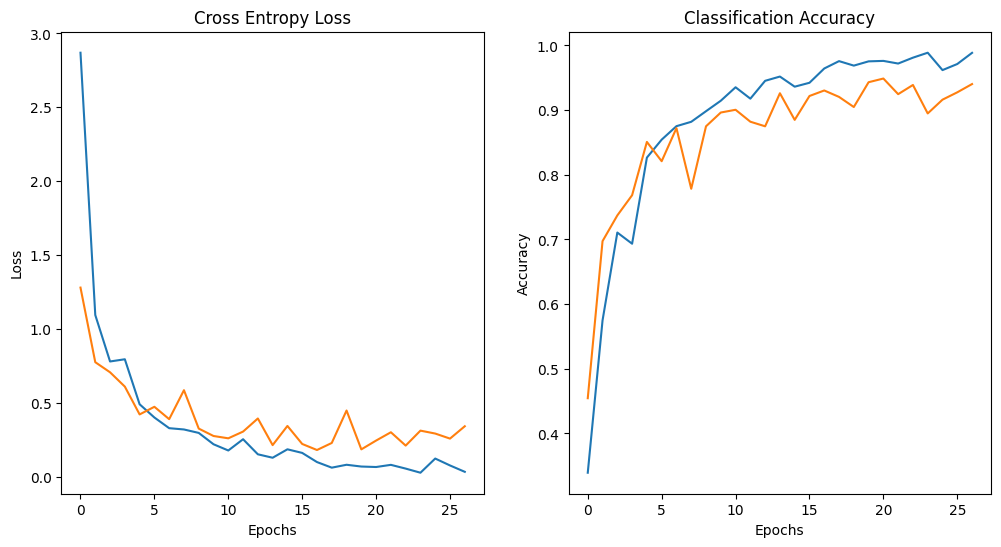

In [20]:
error = pd.DataFrame(history.history)

plt.figure(figsize=(12,6))

plt.subplot(121)
plt.title('Cross Entropy Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.plot(error['loss'])
plt.plot(error['val_loss'])

plt.subplot(122)
plt.title('Classification Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.plot(error['accuracy'])
plt.plot(error['val_accuracy'])

plt.show()

In [11]:
import numpy as np

In [22]:
result = model.predict(test_generator, verbose=0)

y_pred = np.argmax(result, axis = 1)

y_true = test_generator.labels

loss,acc = model.evaluate(test_generator, verbose=0)

print('Model accuracy:',acc*100)
print('Model loss:',loss)

Model accuracy: 92.87749528884888
Model loss: 0.264004111289978


In [14]:
test_generator.class_indices

{'glioma': 0, 'meningioma': 1, 'notumor': 2, 'pituitary': 3}

In [15]:
from sklearn.metrics import classification_report

In [16]:
print(classification_report(y_true, y_pred,target_names=test_generator.class_indices.keys()))

              precision    recall  f1-score   support

      glioma       0.93      0.91      0.92       162
  meningioma       0.89      0.85      0.87       164
     notumor       0.92      0.97      0.94       200
   pituitary       0.97      0.97      0.97       176

    accuracy                           0.93       702
   macro avg       0.93      0.93      0.93       702
weighted avg       0.93      0.93      0.93       702

